In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from plotnine import *
import sys
sys.path.append("../src/")
from src import legend_kwargs

def read_sample_chroms(sample, filter_df = True):
    data_dir = f"../processed-data/pilot-admixfrog-allentoft/{sample}"

    singlechroms = []
    for i in range(1, 23):
        file_i = f"{data_dir}/{i}.rle.xz"
        if os.path.exists(file_i):
            df_i = pd.read_csv(file_i)
            singlechroms.append(df_i)
        else:
            print(f"Sample {sample}: No result file for chrom {i}")

    df = pd.concat(singlechroms)
    # Need to reset the index so each row has a unique idx
    df.reset_index(drop=True, inplace=True)
    if filter_df:
        df = filter_output(df)
    return df

def filter_output(df):    
    # Filter to remove the state annotations
    df = df.loc[df["type"] != "state"]
    # Remove any archaic calls that are shorter than 0.05 cM
    min_len = .05
    df = df.drop(df.loc[((df['map_len']  < min_len) & (df['target'] != 'AFR'))].index)
    return df

def plot_introgression(sample, df=None, suffix = "", drop_afr=True):
    # Create a dataframe of chromosome lengths for plotting
    chrom_lens = {
        1 : 249_250_621,
        2 : 243_199_373,
        3 : 198_022_430,
        4 : 191_154_276,
        5 : 180_915_260,
        6 : 171_115_067,
        7 : 159_138_663,
        # X : 155_270_560,
        8 : 146_364_022,
        9 : 141_213_431,
        10 : 135_534_747,
        11 : 135_006_516,
        12 : 133_851_895,
        13 : 115_169_878,
        14 : 107_349_540,
        15 : 102_531_392,
        16 : 90_354_753,
        17 : 81_195_210,
        18 : 78_077_248,
        20 : 63_025_520,
        # Y : 59_373_566,
        19 : 59_128_983,
        22 : 51_304_566,
        21 : 48_129_895,
        }
    chromosomes = pd.DataFrame([chrom_lens]).T.reset_index()
    chromosomes.columns = ['chrom', 'length']
    chromosomes['x'] = 0

    # color map for plotting
    colormap = {
        'AFR' : "darkgrey", 
        # 'AFR' : "lightgrey", 
        'NEA' : "c", 
        'DEN' : "y", 
        'AFRNEA' : "magenta", 
        'AFRDEN' : "lime", 
        'NEADEN' : "orange",
    }
    if df is None:
        df = read_sample_chroms(sample)
    else:
        df = filter_output(df)
    if drop_afr:
        # Skip plotting AFR ancestry
        df = df[df['target'] != "AFR"]
    p1 = (
        ggplot()
        + geom_segment(
            aes(x='x', xend='length', y='chrom', yend='chrom'), 
            data=chromosomes, 
            color='grey', alpha=.2, size=5)
        + geom_segment(
            aes(x='pos', xend='pos_end', y='chrom', yend='chrom', color='target'), 
            size=5, 
            data=df)
        + scale_color_manual(values=colormap, na_value='grey')
        + scale_y_continuous(breaks=range(1, 23))
        + labs(x="Position [bp]", y="Chromosome", color="Ancestry", title=sample + suffix)
        + theme_bw()
        + theme(panel_grid_major=element_blank(),  # Remove major gridlines
                panel_grid_minor=element_blank(),
                panel_border=element_blank())
    )
    p1.show()


# Chromosome lengths are taken from https://genome.ucsc.edu/cgi-bin/hgTracks?db=hg19&chromInfoPage=
chrom_lens = {
    1 : 249_250_621,
    2 : 243_199_373,
    3 : 198_022_430,
    4 : 191_154_276,
    5 : 180_915_260,
    6 : 171_115_067,
    7 : 159_138_663,
    # X : 155_270_560,
    8 : 146_364_022,
    9 : 141_213_431,
    10 : 135_534_747,
    11 : 135_006_516,
    12 : 133_851_895,
    13 : 115_169_878,
    14 : 107_349_540,
    15 : 102_531_392,
    16 : 90_354_753,
    17 : 81_195_210,
    18 : 78_077_248,
    20 : 63_025_520,
    # Y : 59_373_566,
    19 : 59_128_983,
    22 : 51_304_566,
    21 : 48_129_895,
    }

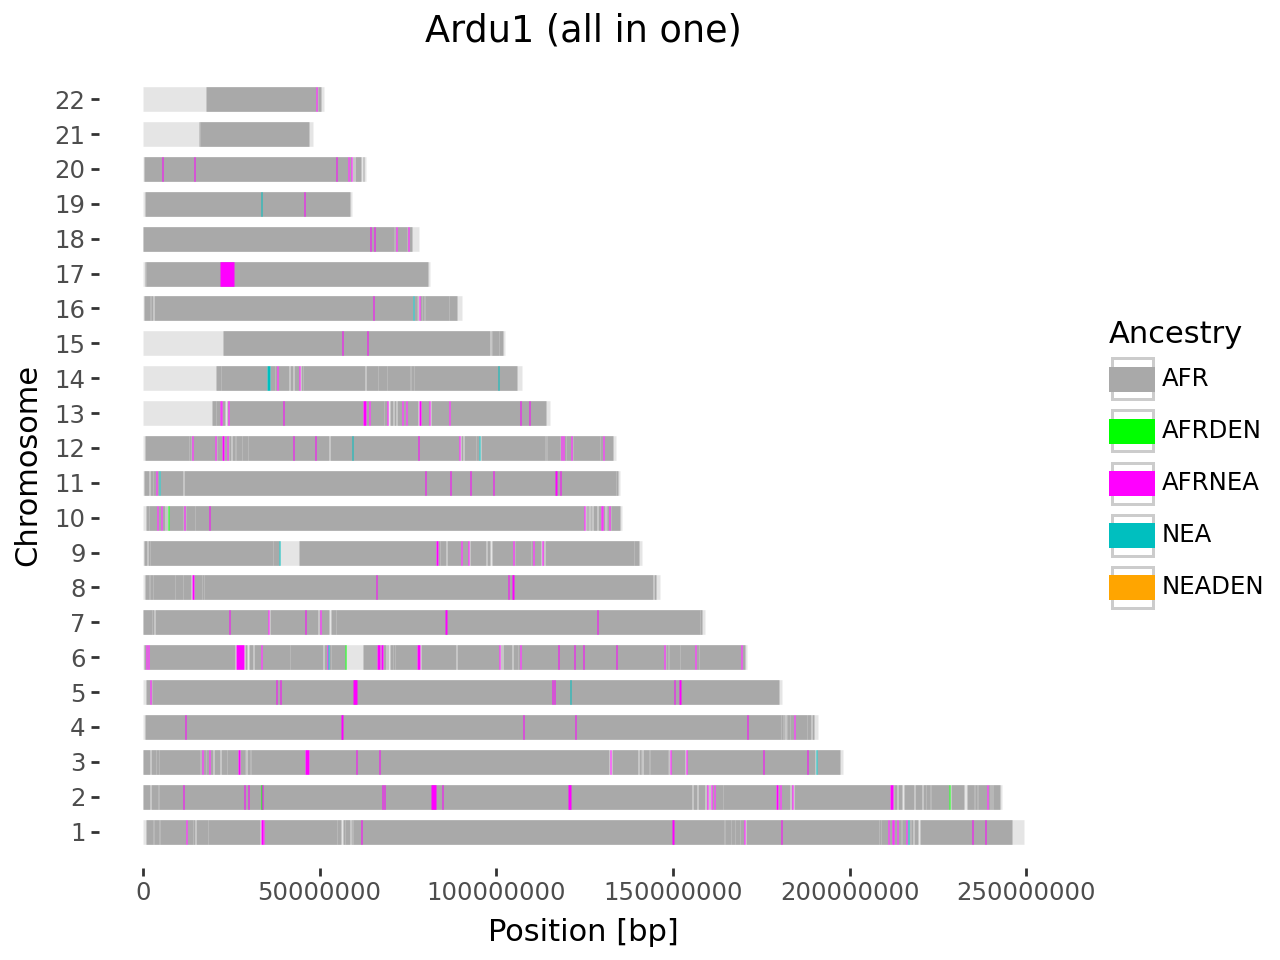

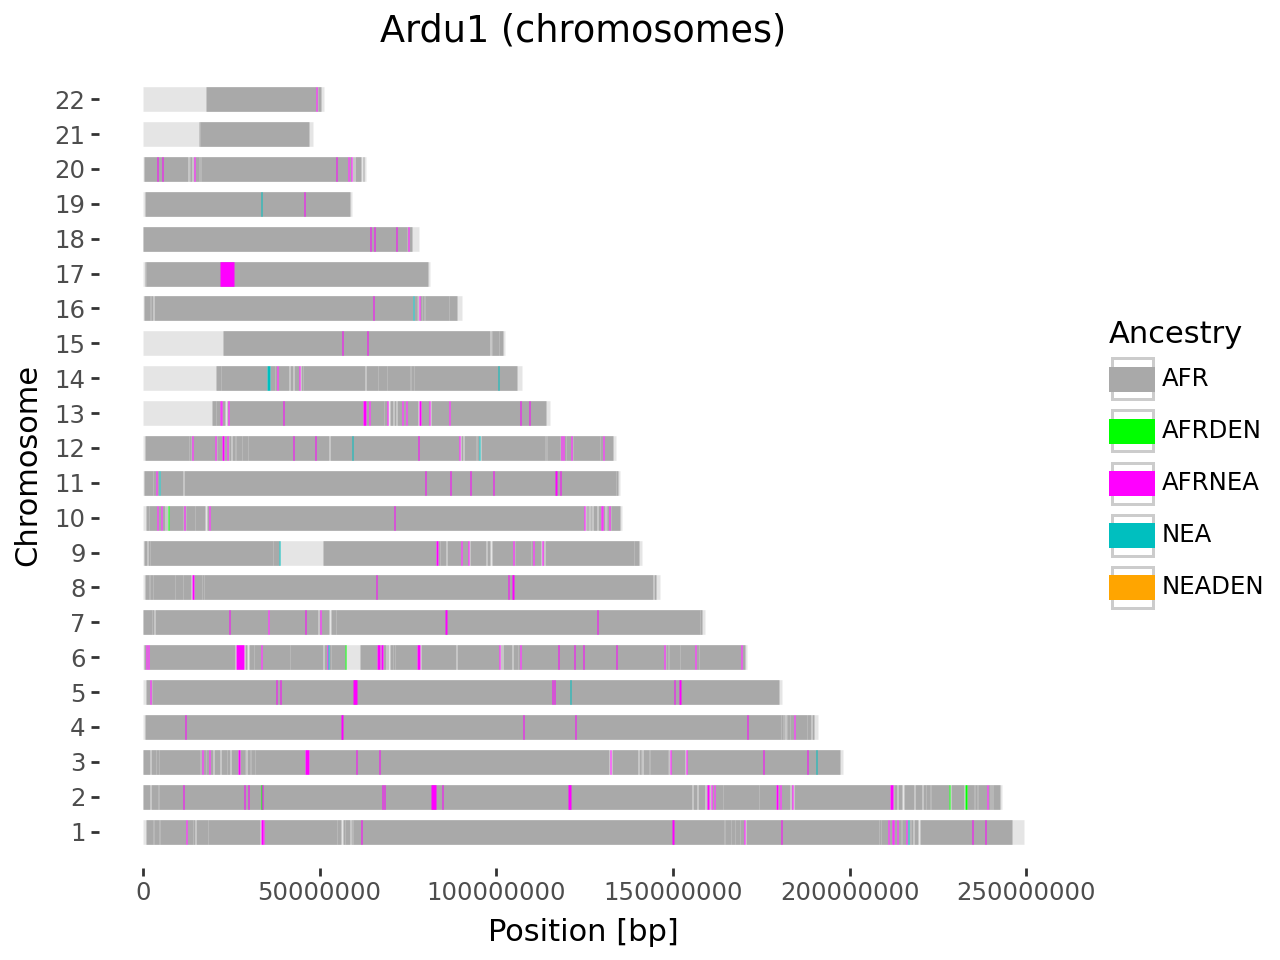

In [5]:
# plot_introgression("DA337", drop_afr=False)
# plot_introgression("NEO306", drop_afr=False)
# plot_introgression("La727", drop_afr=False)
plot_introgression("Ardu1", 
    df = pd.read_csv(f"../processed-data/pilot-admixfrog-allentoft/Ardu1/Ardu1.rle.xz"),
    suffix=" (all in one)", drop_afr=False)
plot_introgression("Ardu1", suffix=" (chromosomes)", drop_afr=False)
# plot_introgression("Ardu2", drop_afr=False)
# plot_introgression('IVLS09KT', drop_afr=False)
# plot_introgression('X15', drop_afr=False)
# plot_introgression('Ma554', drop_afr=False)

In [20]:
import subprocess
command = (
    "squeue -u jackdemaray | awk 'BEGIN {OFS=\",\"; print \"JOBID,PARTITION,NAME,USER,STATE,NODELIST\" } NR>1 {print $1,$2,$3,$4,$5,$6}' "
    "> ../processed-data/squeue_output.csv"
)
subprocess.run(command, shell=True)
jobs = pd.read_csv("../processed-data/squeue_output.csv")
jobs[jobs["STATE"] == "R"]["NODELIST"].unique()
# jobs[jobs["STATE"] == "R"]
# jobs

array(['3:49:36', '17:25', '25:17', '1:18:12', '1:19:00', '1:19:13',
       '1:19:16', '1:20:49', '1:20:59', '1:24:30', '1:24:43', '1:24:52',
       '1:24:55', '1:24:58', '1:25:13', '1:25:16', '1:25:19', '1:25:22',
       '1:25:28', '1:25:46', '1:25:50', '1:25:57', '1:26:03', '1:26:06',
       '1:26:09', '1:26:12', '1:21:39', '1:21:42', '1:22:01', '1:22:06',
       '1:22:11', '1:22:17', '1:22:23', '1:22:26', '1:22:35', '1:22:56',
       '1:23:01', '1:23:07', '1:23:19', '1:23:31', '1:23:43', '1:23:49',
       '1:24:14', '1:24:19', '1:26:20', '1:26:25', '1:26:29', '1:26:49',
       '1:27:01', '1:27:04', '1:27:24', '1:27:35', '1:27:51', '1:27:57',
       '1:30:31', '1:30:45', '1:31:04', '1:31:12', '1:31:31', '1:31:43',
       '1:32:35', '3:39:20'], dtype=object)

### Maps for other all-in-one runs

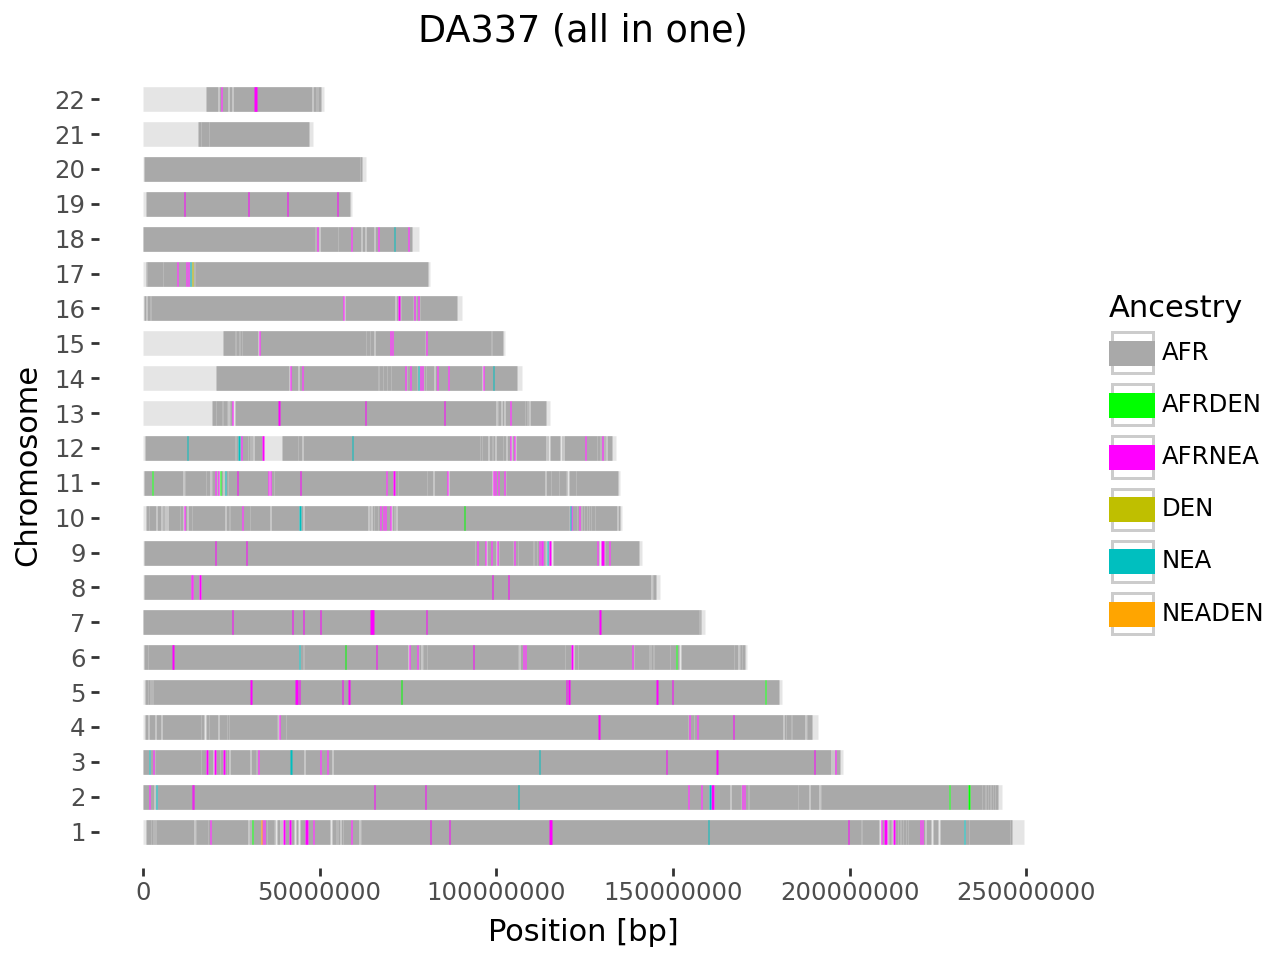

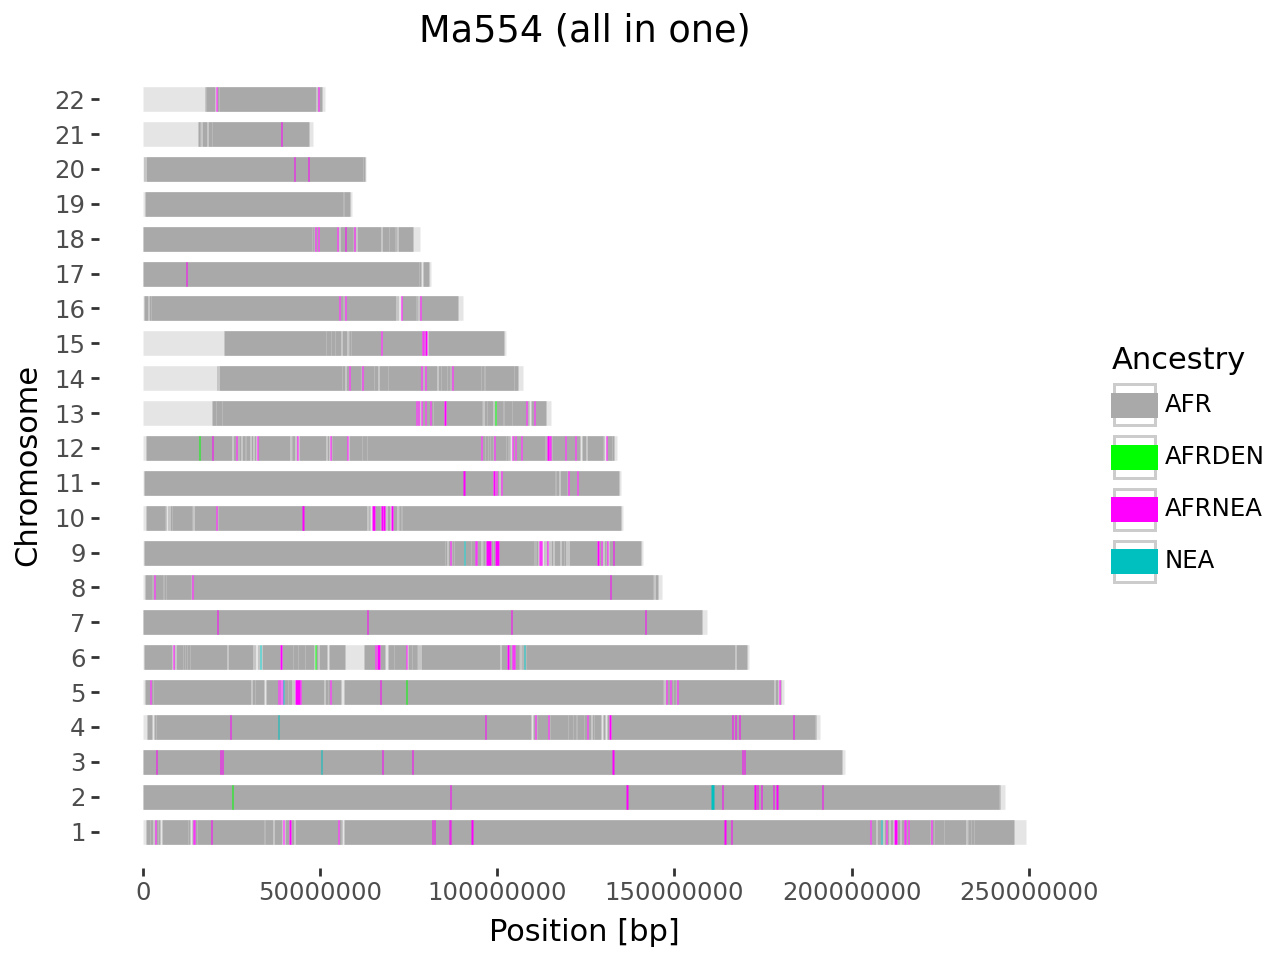

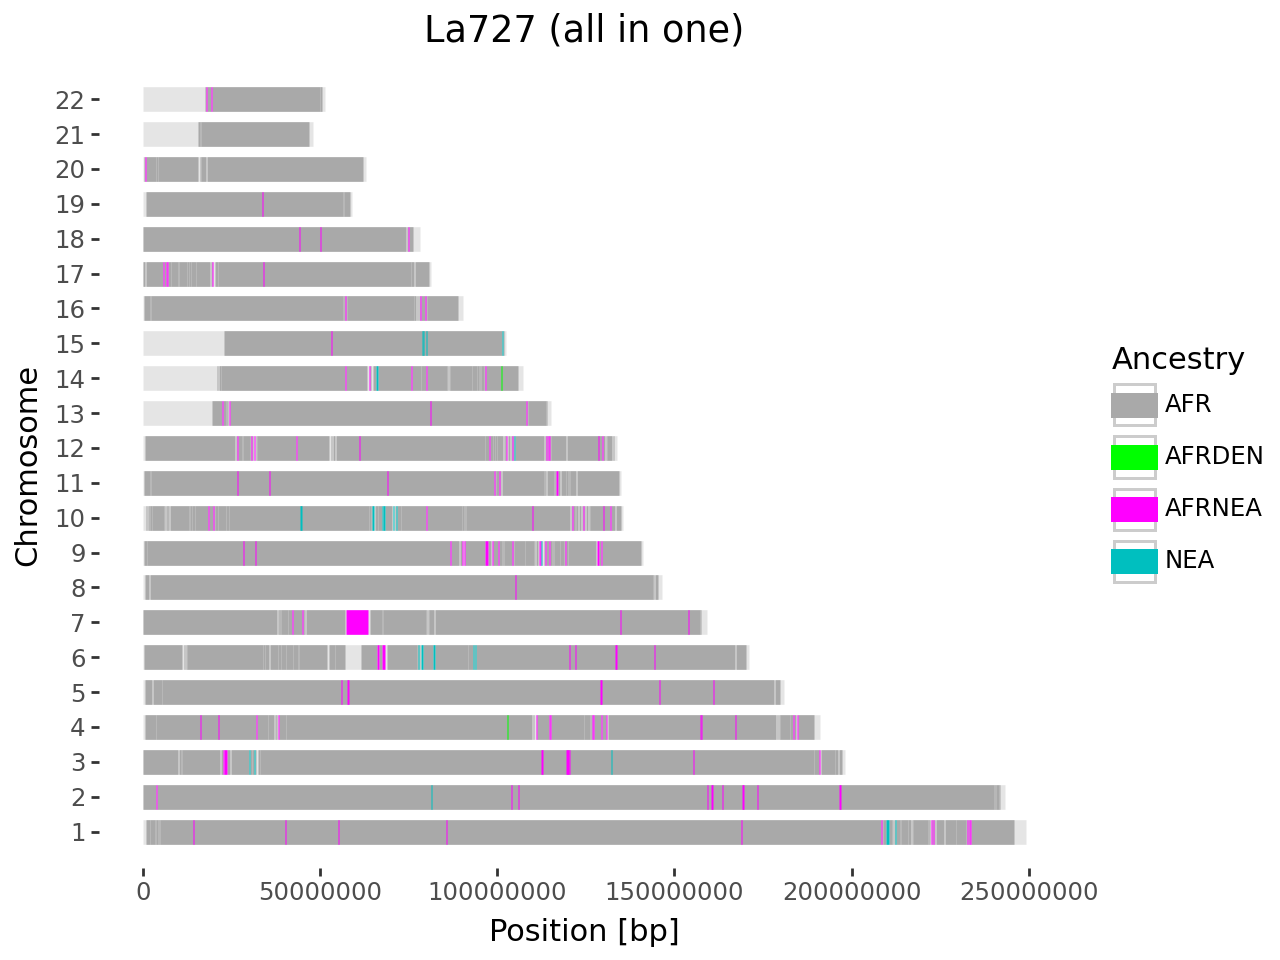

In [7]:
plot_introgression("DA337", 
    df = pd.read_csv(f"../processed-data/pilot-admixfrog-allentoft/DA337/DA337.rle.xz"),
    suffix=" (all in one)", drop_afr=False)
plot_introgression("Ma554", 
    df = pd.read_csv(f"../processed-data/pilot-admixfrog-allentoft/Ma554/Ma554.rle.xz"),
    suffix=" (all in one)", drop_afr=False)
plot_introgression("La727", 
    df = pd.read_csv(f"../processed-data/pilot-admixfrog-allentoft/La727/La727.rle.xz"),
    suffix=" (all in one)", drop_afr=False)

## Ust-Ishim positive control

Sample Ust_Ishim: No result file for chrom 21


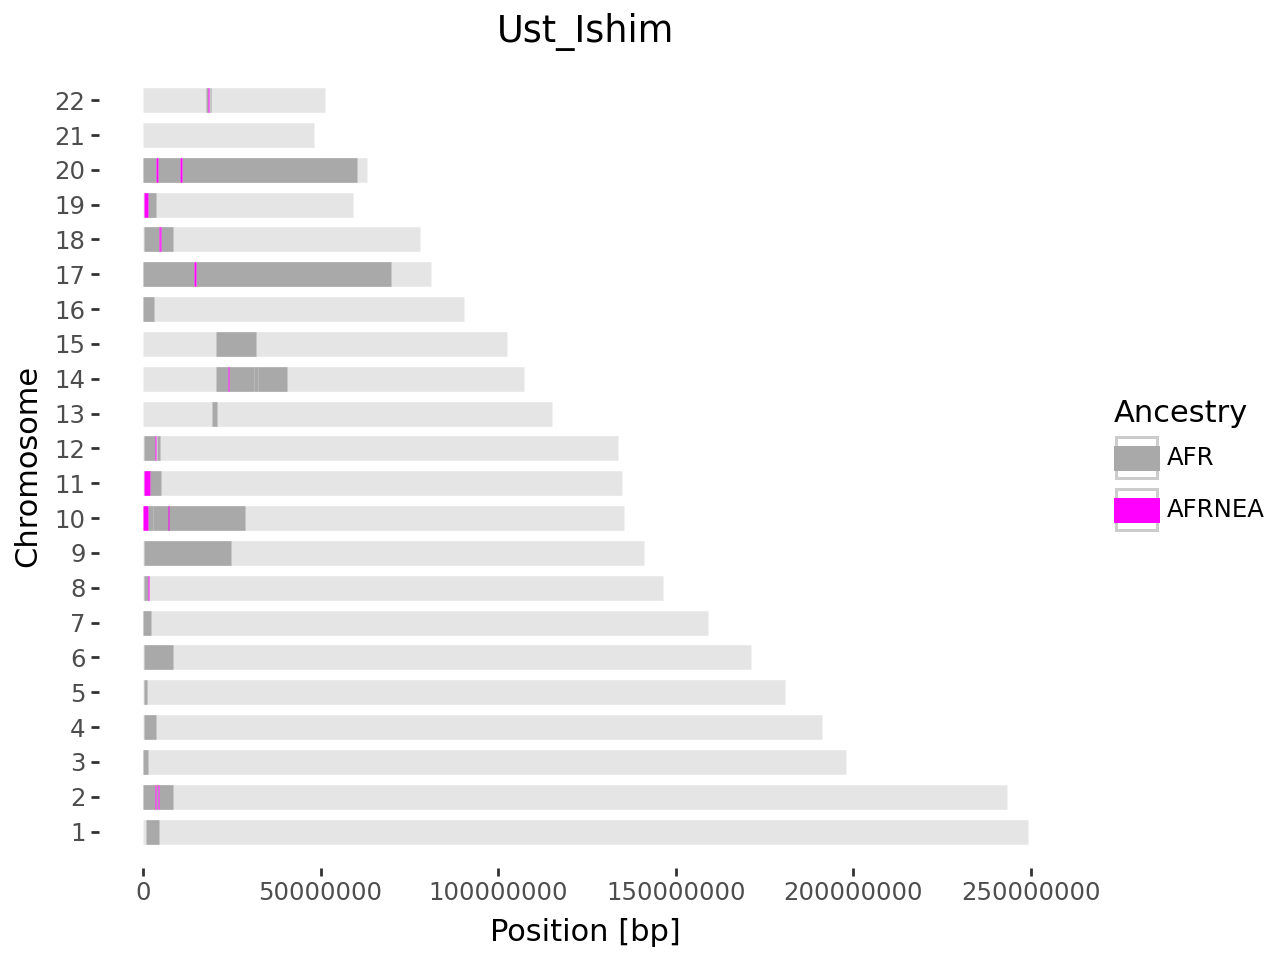

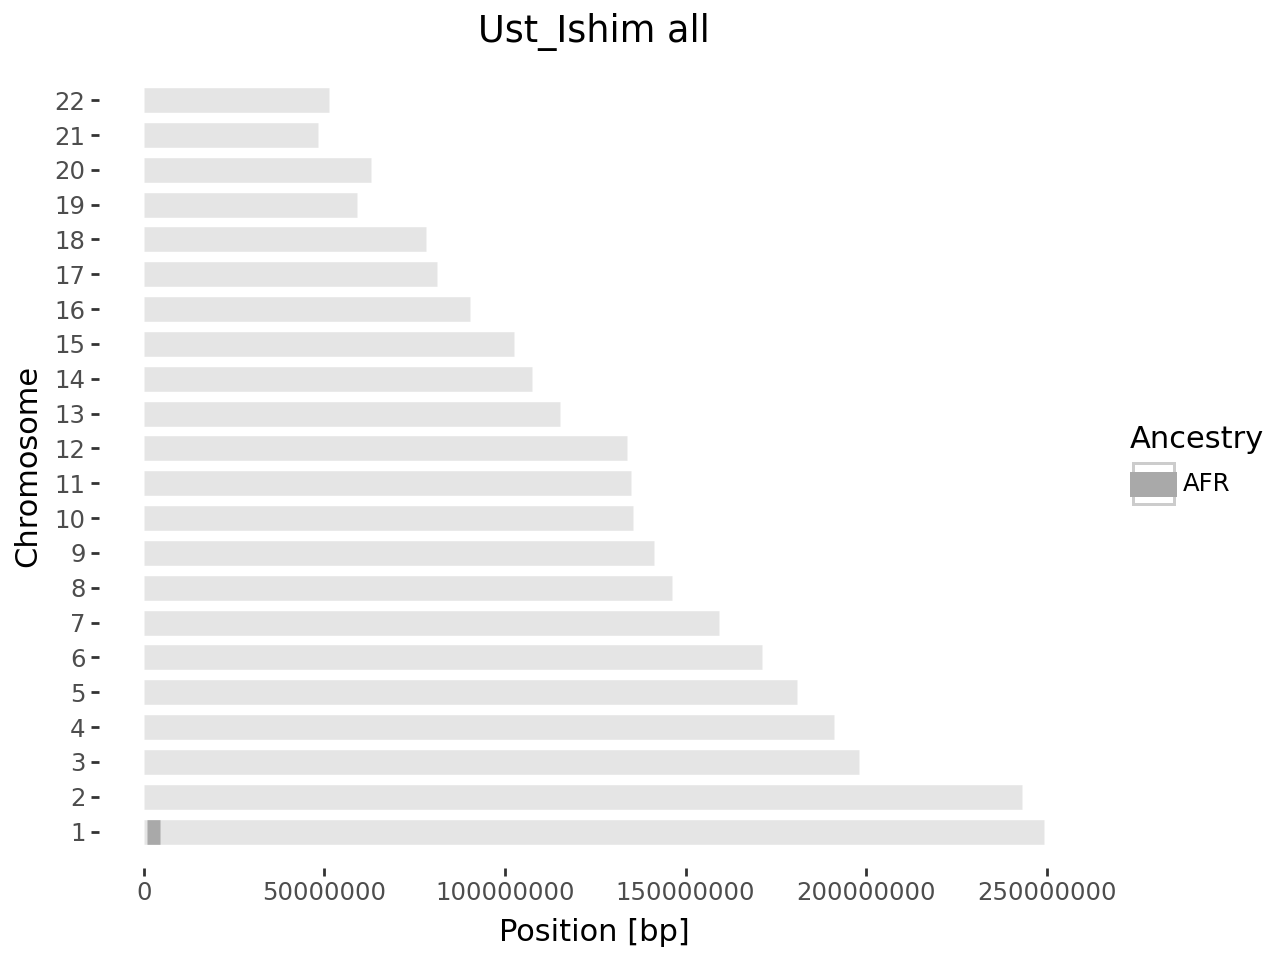

In [13]:
ust = pd.read_csv(f"../processed-data/pilot-admixfrog-allentoft/Ust_Ishim/Ust_Ishim.rle.xz")
plot_introgression('Ust_Ishim', drop_afr=False)
plot_introgression('Ust_Ishim', df = ust, drop_afr=False, suffix = ' all')

# Ardu1 Results Comparison

In [14]:
metadata = pd.read_csv("../processed-data/metadata_allentoft_et_al_2024.csv", index_col="Individual ID")
metadata.loc["Ardu1"]

Site                                   Ardu, Harju
Country                                    Estonia
Region                              NorthernEurope
Group label                  Estonia_Neolithic_CWC
Latitude                                      59.1
Longitude                                    25.36
Data source               Saag_CurrentBiology_2017
Age (upper)                                  4,821
Age (lower)                                  4,455
Age average                                  4,638
Dating                                      direct
Sex                                             XY
Y haplogroup (major)                           R1a
Y haplogroup (derived)                     R1a1a1b
Coverage                                      0.56
Average GP                                   0.993
Flag                                             0
Cluster ID                             1.2.3.2.2.1
Cluster fine                EuropeNE_4800BP_3000BP
Cluster global                E

In [5]:
# Read in the annotation % summary from the all-in-one run
res2_all = pd.read_csv("../processed-data/pilot-admixfrog-allentoft/Ardu1/Ardu1.res2.xz")
print("all-in-one results: ")
print(res2_all.to_markdown(tablefmt='grid'))

# Read in the annotation % summaries for each respective chromosome and aggregate them
autosome_total = sum(chrom_lens.values())
chrom_res2s = []
for i in range(1, 23):
    df_i = pd.read_csv(f"../processed-data/pilot-admixfrog-allentoft/Ardu1/{i}.res2.xz")
    # Scale the % values for mean, sd, and lower/upper bounds by the corresponding hg19 chromosome length [bp]
    df_i.iloc[:, 1:] = df_i.iloc[:, 1:] * chrom_lens[i]
    chrom_res2s.append(df_i)
# Concatenate all these scaled individual dfs, them divide by the sum of autosome lengths
chrom_res2s_concat = pd.concat(chrom_res2s)
res2_chroms = pd.DataFrame(columns=chrom_res2s_concat.columns)
res2_chroms["state"] = chrom_res2s_concat["state"].unique().tolist()
# Sum up the mean and upper/lower bounds, then divide by autosome length
res2_chroms = chrom_res2s_concat.groupby("state").sum() / autosome_total

# Calculate the standard deviation
sd_tmp = chrom_res2s_concat.loc[:, ['state', 'sd']]
# Propogate error by summing the squares, taking the square root of the sum, and dividing by the total autosome length
sd_tmp['sd'] = sd_tmp['sd'] ** 2
sd_tmp = sd_tmp.groupby("state").sum().apply(lambda x: x**(1/2))
sd_tmp['sd'] = sd_tmp['sd'] / autosome_total
# Finally, transfer the results back to the dataframe with the mean etc.
res2_chroms['sd'] = sd_tmp['sd']

print("chromosome aaggregated results:")
print(res2_chroms.to_markdown(tablefmt='grid'))

all-in-one results: 
+----+---------+----------+----------+----------+----------+
|    | state   |     mean |       sd |    lower |    upper |
+====+=========+==========+==========+==========+==========+
|  0 | AFR     | 0.972839 | 0.000408 | 0.97204  | 0.973638 |
+----+---------+----------+----------+----------+----------+
|  1 | DEN     | 0.002913 | 0.000129 | 0.002659 | 0.003166 |
+----+---------+----------+----------+----------+----------+
|  2 | NEA     | 0.024248 | 0.000392 | 0.023479 | 0.025017 |
+----+---------+----------+----------+----------+----------+
chromosome aaggregated results:
+---------+------------+-------------+------------+------------+
| state   |       mean |          sd |      lower |      upper |
+=========+============+=============+============+============+
| AFR     | 0.972964   | 0.000407182 | 0.969408   | 0.97652    |
+---------+------------+-------------+------------+------------+
| DEN     | 0.00272578 | 0.000110742 | 0.00187842 | 0.00357319 |
+-------

### Making csv files gluing the chromosome and all in one outputs together to look for missing region in Chr9

I found that there's a run of AFR ancestry starting ~45MB in the all in one run that seems similar to one that starts ~50MB in the chromosome sample, which lines up with the gap in the chromosome map for the chromosome approach and indicates that the chromosome run indeed does not capture that region

In [61]:
df_chroms_raw = read_sample_chroms("Ardu1", filter_df=False)
df_all_raw = pd.read_csv(f"../processed-data/pilot-admixfrog-allentoft/Ardu1/Ardu1.rle.xz")

all_chr9 = (df_all_raw[df_all_raw['chrom'] == 9])
chrom_chr9 = (df_chroms_raw[df_chroms_raw['chrom'] == 9])
# all_chr9 = (df_all_raw[df_all_raw['chrom'] == 9])
# chrom_chr9 = (df_chroms_raw[df_chroms_raw['chrom'] == 9])

pd.concat([all_chr9, chrom_chr9], keys=['all', 'chrom'], names=['run']).reset_index().sort_values(by=['pos', 'run']).to_csv("../processed-data/pilot-admixfrog-allentoft/Ardu1/ardu1qc_raw.csv")